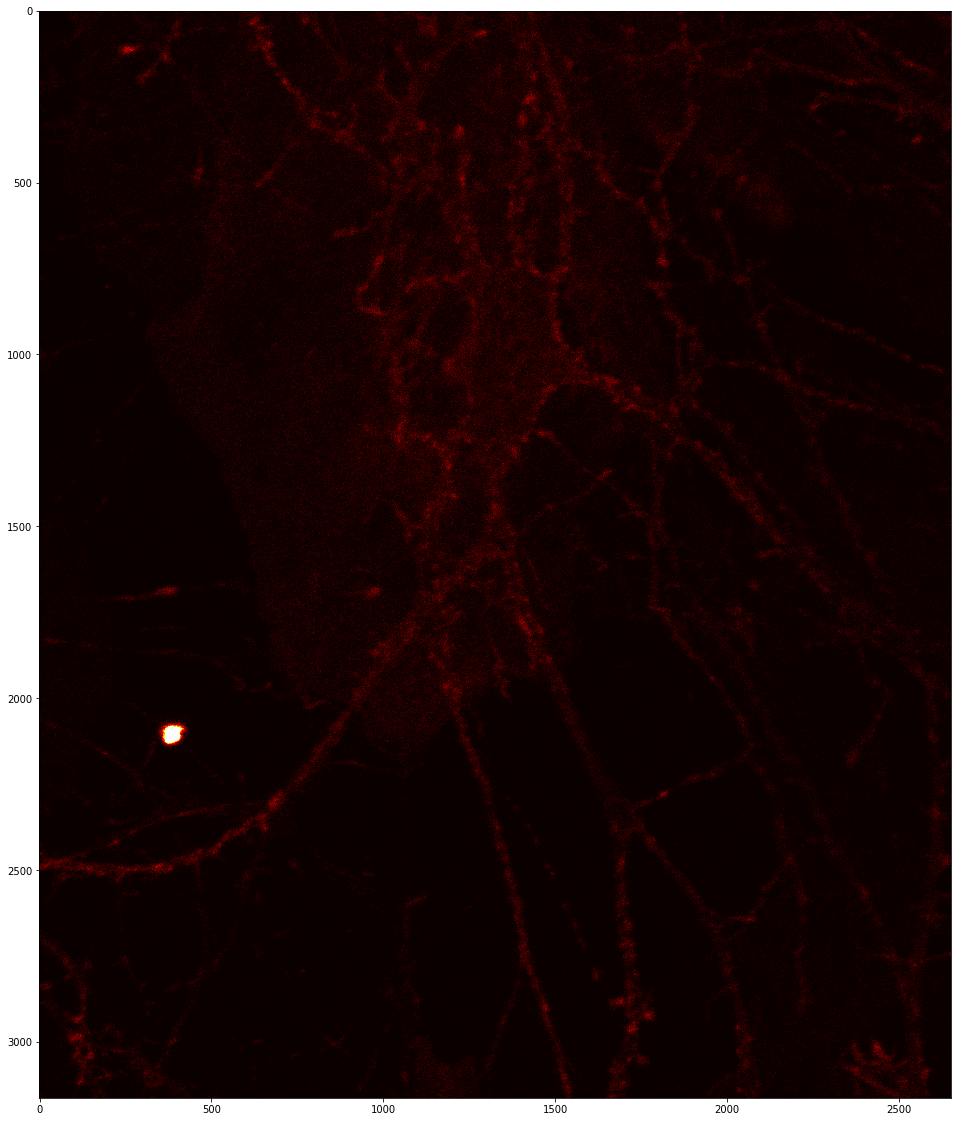

In [9]:
import czifile
import numpy as np
import matplotlib.pyplot as plt
czi = czifile.imread(".\data\RT_HC_20X_12-4-19_PLMD94_B.czi")
img = czi[0,0,0,:,0,:,:,0]
img = img[0,:,:]
plt.figure(figsize = (20,20))
plt.imshow(img, cmap = "hot")

In [17]:

img2 = img[:500, :500]
img2.shape

(500, 500)

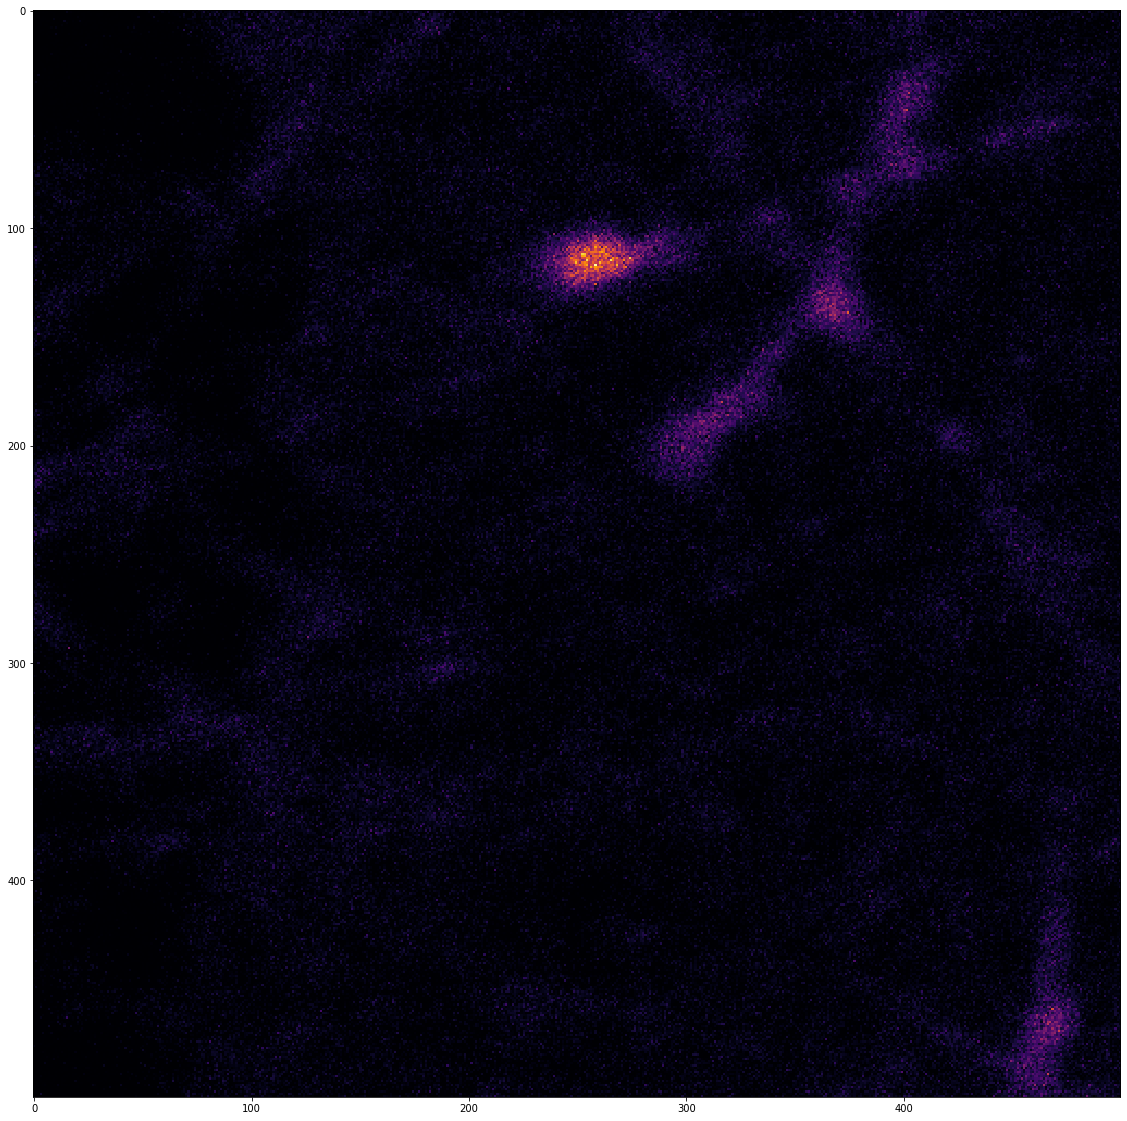

In [21]:
plt.figure(figsize = (20,20))
plt.imshow(img2, cmap = "inferno")

(array([1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2000e+01, 0.0000e+00, 2.6000e+01, 8.0000e+00, 0.0000e+00,
        8.9000e+01, 1.0000e+00, 4.1000e+01, 1.1900e+02, 2.0000e+00,
        1.9700e+02, 8.6000e+01, 4.6000e+01, 3.9000e+02, 2.8000e+01,
        2.8300e+02, 4.6300e+02, 6.6000e+01, 7.7100e+02, 3.9400e+02,
        2.5900e+02, 1.3210e+03, 3.2500e+02, 9.3000e+02, 1.7250e+03,
        4.7600e+02, 2.4240e+03, 1.4110e+03, 1.0810e+03, 3.9590e+03,
        1.4080e+03, 2.5630e+03, 4.8200e+03, 1.6900e+03, 5.9640e+03,
        4.4940e+03, 2.9290e+03, 9.5960e+03, 4.5220e+03, 5.5680e+03,
        1.1932e+04, 4.9770e+03, 1.1719e+04, 1.2056e+04, 6.1710e+03,
        1.8524e+04, 1.2679e+04, 9.0640e+03, 2.3781e+04, 1.3196e+04,
        1.7173e+04, 2.6501e+04, 1.3785e+04, 2.7440e+04, 2.9270e+04,
        1.4099e+04, 3.6864e+04, 3.1147e+04, 2.0879e+04, 4.3015e+04,
        2.9902e+04, 3.0848e+04, 5.1275e+04, 2.6450e+04, 4.1556e+04,
        5.6467e+04, 2.7419e+04, 5.1009e+04, 5.69

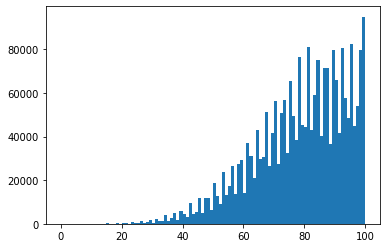

In [11]:
plt.hist(img.flat, bins=100, range=(0,100))  #.flat returns the flattened numpy array (1D)

In [12]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)


C:\Users\Russel\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


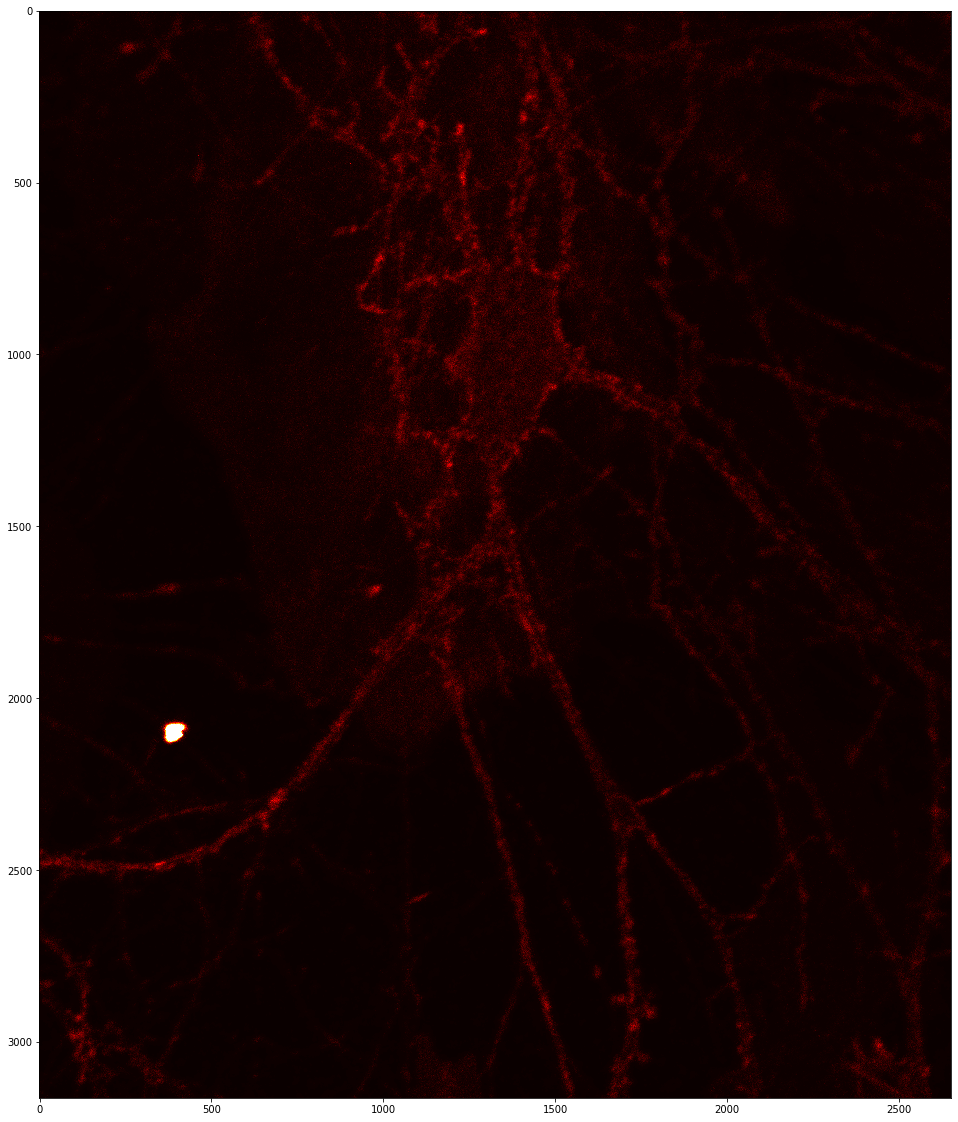

In [7]:
#plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')
plt.figure(figsize = (20,20))
plt.imshow(denoise_img_as_8byte, cmap = "hot")

(array([1.697383e+06, 2.317416e+06, 1.271752e+06, 6.458210e+05,
        4.362440e+05, 3.198260e+05, 2.479180e+05, 1.979790e+05,
        1.639080e+05, 1.385640e+05, 1.180760e+05, 1.017400e+05,
        8.832600e+04, 7.672900e+04, 6.775000e+04, 5.878200e+04,
        5.216300e+04, 4.539900e+04, 4.026600e+04, 3.474000e+04,
        3.065100e+04, 2.711300e+04, 2.369600e+04, 2.090400e+04,
        1.856800e+04, 1.616100e+04, 1.428600e+04, 1.271000e+04,
        1.114200e+04, 9.996000e+03, 8.840000e+03, 7.691000e+03,
        6.957000e+03, 6.074000e+03, 5.517000e+03, 4.756000e+03,
        4.269000e+03, 3.846000e+03, 3.415000e+03, 2.989000e+03,
        2.600000e+03, 2.347000e+03, 2.038000e+03, 1.854000e+03,
        1.676000e+03, 1.511000e+03, 1.301000e+03, 1.114000e+03,
        1.052000e+03, 9.840000e+02, 8.860000e+02, 7.360000e+02,
        6.810000e+02, 6.330000e+02, 4.930000e+02, 5.160000e+02,
        4.330000e+02, 4.140000e+02, 3.420000e+02, 3.280000e+02,
        3.030000e+02, 2.500000e+02, 2.25

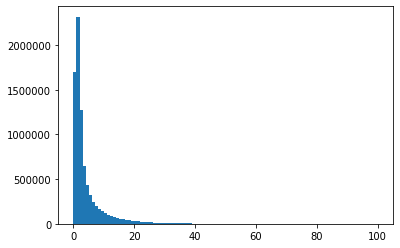

In [21]:
plt.hist(denoise_img_as_8byte.flat, bins=100, range=(0,100))  #.flat returns the flattened numpy array (1D)

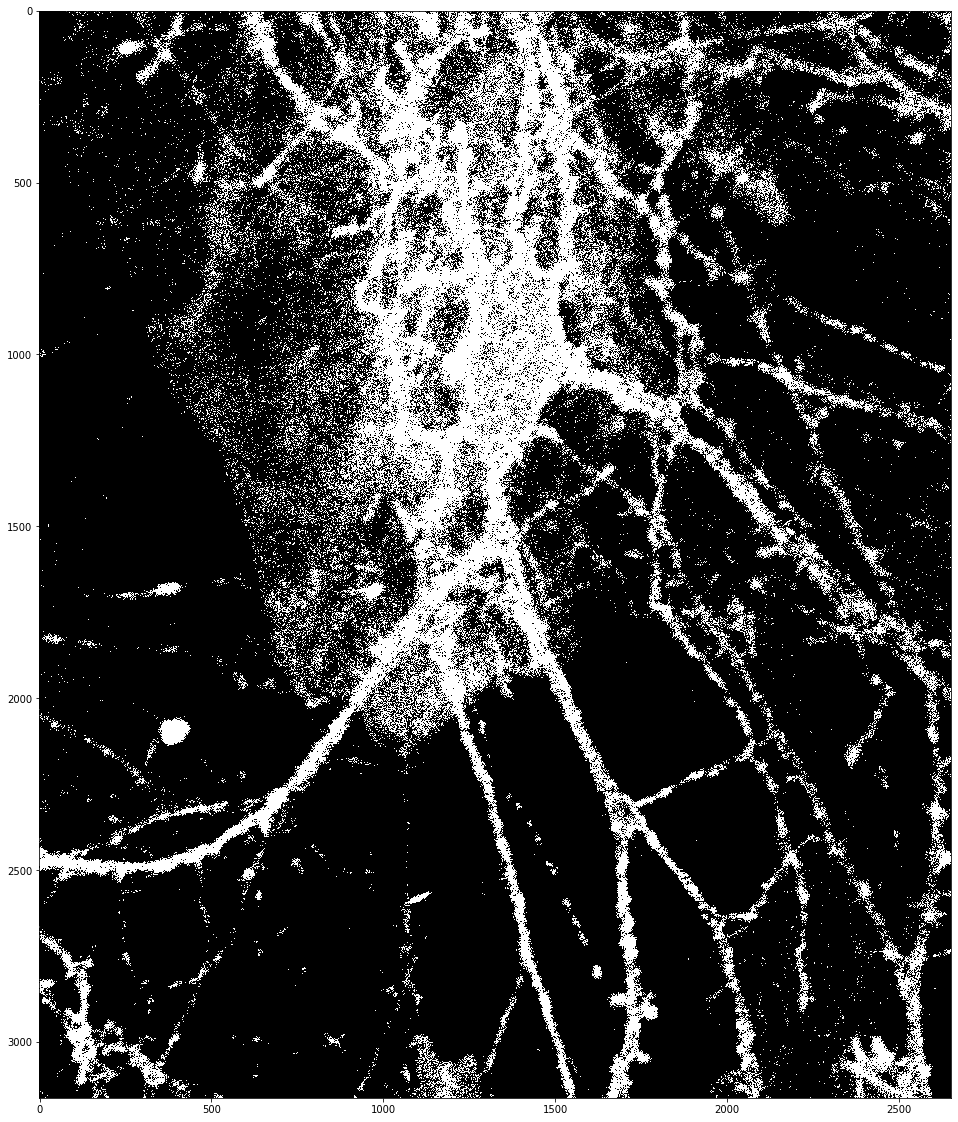

In [33]:
segm1 = (denoise_img_as_8byte <= 5)
segm2 = (denoise_img_as_8byte > 5) 

#How to show all these images in single visualization?
#Construct a new empty image with same shape as original except with 3 layers.
#print(median_img.shape[0])
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (0,0,0)
all_segments[segm2] = (1,1,1)

plt.figure(figsize = (20,20))
plt.imshow(all_segments)

#Lot of yellow dots, red dots and stray dots. how to clean
#We can use binary opening and closing operations. Open takes care of isolated pixels within the window
#Closing takes care of isolated holes within the defined window


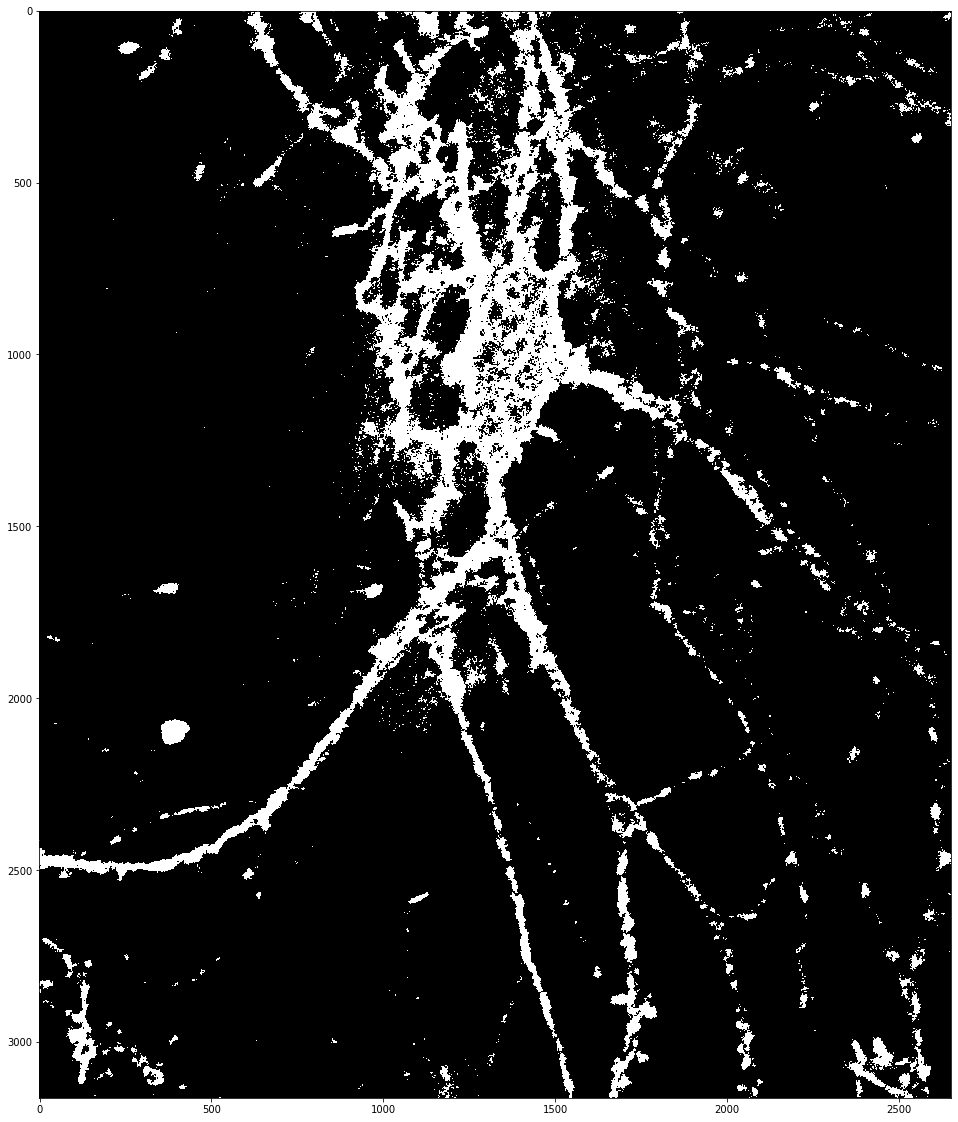

In [34]:
from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))


all_segments_cleaned = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but 714, 901, 3

all_segments_cleaned[segm1_closed] = (0,0,0)
all_segments_cleaned[segm2_closed] = (1,1,1)

plt.figure(figsize = (20,20))
plt.imshow(all_segments_cleaned)  #All the noise should be cleaned now